In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


**Cleaning**

In [14]:
df=pd.read_csv('https://raw.githubusercontent.com/singhrau0/Youtube-Data-Analysis/main/USvideos.csv')

In [8]:
js=pd.read_json('https://raw.githubusercontent.com/singhrau0/Youtube-Data-Analysis/main/US_category_id.json')

In [19]:
df.drop(['thumbnail_link', 'comments_disabled', 'ratings_disabled',
       'video_error_or_removed', 'description','tags'],axis=1,inplace=True)

In [20]:
df.isnull().sum()

video_id         0
trending_date    0
title            0
channel_title    0
category_id      0
publish_time     0
views            0
likes            0
dislikes         0
comment_count    0
dtype: int64

In [48]:
df.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,month,year
0,-0CMnp02rNY,2018-06-11,Mindy Kaling's Daughter Had the Perfect Reacti...,TheEllenShow,24,2018-06-04 13:00:00+00:00,800359,9773,332,423,June,2018


In [31]:
df=df.groupby("video_id").max()

In [33]:
df.reset_index(inplace=True)

In [34]:
df['trending_date']

0       18.11.06
1       18.01.02
2       18.30.04
3       17.30.11
4       17.16.11
          ...   
6346    18.31.03
6347    17.19.11
6348    18.25.05
6349    17.14.11
6350    18.06.02
Name: trending_date, Length: 6351, dtype: object

In [40]:
df['trending_date']=pd.to_datetime(df['trending_date'],format="%y.%d.%m")

In [42]:
df['publish_time']=pd.to_datetime(df['publish_time'],utc=True)

In [43]:
import datetime as dt

In [45]:
df['month']=df['publish_time'].dt.month_name()

In [47]:
df['year']=df['publish_time'].dt.year

In [52]:
#id
js['items'][0]['id']

'1'

In [56]:
#genre
js['items'][0]['snippet']['title']

'Film & Animation'

In [60]:
gl=pd.DataFrame({"category_id":[js['items'][n]['id'] for n in range(0,32)],"genre":[js['items'][n]['snippet']['title'] for n in range(0,32)]})

In [62]:
gl['category_id']=gl['category_id'].astype(int)

In [64]:
df=pd.merge(gl,df,on="category_id",how="inner")

**Linear Regression**


In [67]:
df.corr()

<ipython-input-67-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,category_id,views,likes,dislikes,comment_count,year
category_id,1.000000,-0.152767,-0.153236,-0.017773,-0.059449,0.037837
views,-0.152767,1.000000,0.834697,0.441924,0.574890,0.064120
likes,-0.153236,0.834697,1.000000,0.420523,0.765169,0.055217
dislikes,-0.017773,0.441924,0.420523,1.000000,0.737242,0.014349
comment_count,-0.059449,0.574890,0.765169,0.737242,1.000000,0.035892
year,0.037837,0.064120,0.055217,0.014349,0.035892,1.000000


<ipython-input-71-88edb43bf50b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


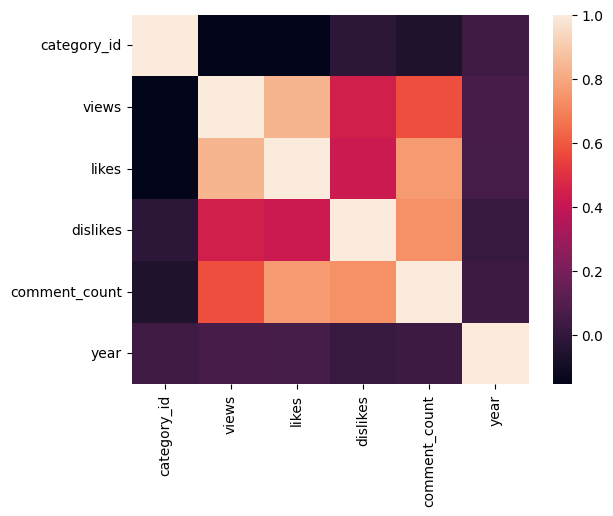

In [71]:
sns.heatmap(df.corr())
plt.show()

In [ ]:
#Here our indipedent columns are ['views','likes','comment_count']
#and dipendent columns is ['likes']

In [87]:
x=df[['views','dislikes','comment_count']]  #indipendent columns

In [88]:
y=df[['likes']] #indipendent columns

In [90]:
from sklearn.model_selection import train_test_split

In [91]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [92]:
from sklearn.linear_model import LinearRegression

In [93]:
lr=LinearRegression()

In [97]:
x_test

,views,dislikes,comment_count
3538,1962973,1525,1068
4816,668826,572,2146
1739,3505996,3400,5162
904,157137,349,486
5323,469539,238,1035
...,...,...,...
5186,1045168,4143,6445
3896,5545698,7807,3308
365,378901,111,937
4202,6183923,8106,13501


In [96]:
y_test

,likes
3538,12513
4816,40435
1739,5934
904,6968
5323,9372
...,...
5186,53603
3896,23966
365,11876
4202,135311


In [94]:
lr.fit(x_train,y_train)

LinearRegression()

In [99]:
lr.predict([[6183923,8106,13501]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[141506.47598685]])

In [100]:
lr.score(x_test,y_test)

0.824998493193406

**END**